# Δεδομένα Πειράματος και Διαλογή Εικόνων
## Ορισμός των μεταβλητών συστήματος 
1. Οι εικόνες βρίσκονται στο dir `/data/raw`
2. το notebook `01-data_access.ipynb` βρίσκεται στο `/notebooks`
3. οπότε για να έχουμε πρόσβαση πρέπει να μεταφερθούμε στο root project directory

### Δομή package 
- `src`
    - `data`
    - `features`
    - `models`
    - `visualization`
    
### Αρχικοποίηση Notebook
- καταχωρούμε αν δεν έχουμε ήδη στο σύστημα το directory του project
- δίνουμε πρόσβαση στο σύστημα για το πχ `C:\Users\plouk\Adiposer`
- Το σύστημα για την ώρα βρίσκεται στο `C:\Users\plouk\anaconda3\python.exe`

In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
module_path

'C:\\Users\\plouk\\Adiposer'

1. Δημιουργούμε πρόσβαση σε ό,τι αρχεία έχουμε γράψει στο `src`
2. Τα module να είναι στο `/src/data`, στο `src/visualization` κλπ
    - `from src.visualization import gif_maker`
3. Από bash terminal εκτελούμε εντολή διαγραφής στο `/data/interim`
    - `$ make clean_interim`
4. Eπεξεργαζόμαστε μία φορά τη βάση των εικόνων `/data/raw`
5. Αποθηκεύουμε με την ίδια δομή στο φάκελο `/data/interim`

### Διερεύνηση του dataset μέσω γραμμής εντολών

In [4]:
# Μεταβίβαση του συστήματος στο project directory 
cd .. ;
# Μεταβίβαση στο directory των δεδομένων 
cd data ;
ls ; # Τα directories εδώ είναι τα στάδια επεξεργασίας των δεδομένων 

 Volume in drive C is Windows
 Volume Serial Number is D293-11C5

 Directory of C:\Users\plouk\Adiposer\data

29-Mar-21  06:24 PM    <DIR>          .
29-Mar-21  06:24 PM    <DIR>          ..
29-Mar-21  06:23 PM               281 bat_list_mouse_1.txt
27-Mar-21  06:08 PM    <DIR>          interim
06-Mar-21  02:00 PM    <DIR>          processed
15-Mar-21  10:32 PM    <DIR>          raw
29-Mar-21  06:23 PM               281 wat_list_mouse_1.txt
               2 File(s)            562 bytes
               5 Dir(s)  117,143,388,160 bytes free


In [ ]:
cd raw/0h/mouse_1 ;
ls ;

### Τι εικόνες περιλαμβάνουν τα raw δεδομένα 
- Θερμικές Εικόνες `IR_*.jpeg`
- Κανονικές Εικόνες `DC_*.jpeg`
- Τιμές Θερμοκρασιών `CSV_*.csv`
- Αρχεία βίντεο `MOV_*.mp4`

### Ονοματοδοσία Αρχείων
- Ζεύγη θερμικής εικόνας και αρχείου θερμοκρασιών
    - Πρότυπο `IR_{id}.jpg / CSV_{id}.csv`
- Εικόνα κάμερας με πρότυπο `DC_{id + 1}.jpg`
- Αρχεία βίντεο `ΜΟV_.mp4` (Δε θα γίνει χρήση τους)

### Πώς δομούνται οι λήψεις του πειράματος
1. Ανά ώρα λήψης (0 έως 240 ώρες) `[sample_hour]`
2. Ανά αριθμό ποντικιού (1 έως 5) `[mouse_id]`

### Στάδια επεξεργασίας των δεδομένων
- `raw`: η βάση δεδομένων του πειράματος
- `interim`: ενοποίηση δεδομένων
- `processed`: επιλεγμένα δεδομένα μετρήσεων

Iεράρχιση directory `/data/stage/sample_hour/mouse_id`

## Αποτύπωση Λήψεων Πειράματος
### Οι λήψεις του mouse_1 κατά την έναρξη του πειράματος (0h)

In [3]:
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from celluloid import Camera
from IPython.display import HTML # to show the animation in Jupyter
from tqdm import tqdm
from glob import glob
infrared_images = []
items = glob(module_path + '/data/raw/0h/mouse_1/IR_*')
for item in items:
    infrared_images.append(imread(fname=item))
optical_images = []
items = glob(module_path + '/data/raw/0h/mouse_1/DC_*')
for item in items:
    optical_images.append(imread(fname=item))

36it [00:02, 14.40it/s]


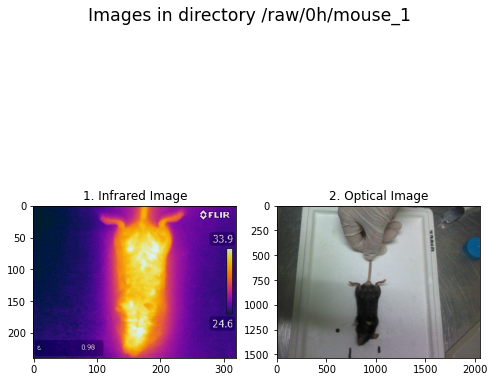

In [12]:
fig = plt.figure(figsize=(8, 8), constrained_layout=False)
fig.suptitle(t='Images in directory /raw/0h/mouse_1', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])
camera = Camera(fig)
for b, c in tqdm(zip(infrared_images, optical_images)):
    ax0.imshow(X=b, cmap=plt.cm.nipy_spectral)
    ax0.set_title(label='1. Infrared Image')
    fig.add_subplot(ax0)
    
    ax1.imshow(X=c)
    ax1.set_title(label='2. Optical Image')
    fig.add_subplot(ax1)
    camera.snap()
animation = camera.animate(interval=1000)
# το HTML πρέπει να τρέχει στο jupyter notebook 
HTML(animation.to_html5_video()) # displaying the animation

### Διαστάσεις θερμικών και οπτικών εικόνων
#### Διαφορά Ανάλυσης μεταξύ των εικόνων

In [31]:
print(f'Infrared Image Shape: {infrared_images[0].shape}, Optical Image Shape: {optical_images[0].shape}')
# Η τρίτη διάσταση αφορά τον χρωματισμό sRGB των θερμικών και οπτικών εικόνων 

Infrared Image Shape: (240, 320, 3), Optical Image Shape: (1536, 2048, 3)


### Επικάλυψη Οπτικής με Θερμική Εικόνα
#### Σύγκριση Ανάλυσης και Μοιρών Φακού 

<AxesSubplot:title={'center':'2. Optical Image'}>

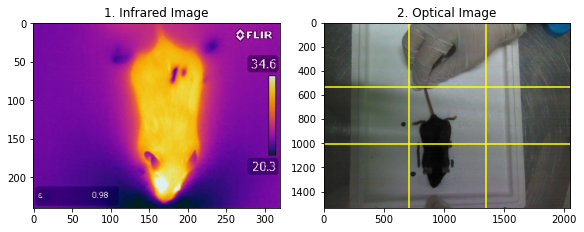

In [6]:
fig = plt.figure(figsize=(8, 8), constrained_layout=True)
# fig.suptitle(t='Shape of a thermal image centered on an optical image', fontsize='xx-large')
grid = fig.add_gridspec(nrows=1, ncols=2, wspace=0.2, hspace=0.25)
ax0 = fig.add_subplot(grid[0])
ax1 = fig.add_subplot(grid[1])

ax0.imshow(X=infrared_images[0], cmap=plt.cm.nipy_spectral)
ax0.set_title(label='1. Infrared Image')
fig.add_subplot(ax0)

ax1.imshow(X=optical_images[0])
ax1.axvline(x=optical_images[0].shape[1]/2 + infrared_images[0].shape[1], ymin=0, ymax=1, c='yellow')
ax1.axvline(x=optical_images[0].shape[1]/2 - infrared_images[0].shape[1], ymin=0, ymax=1, c='yellow')
ax1.axhline(y=optical_images[0].shape[0]/2 + infrared_images[0].shape[0], xmin=0, xmax=1, c='yellow')
ax1.axhline(y=optical_images[0].shape[0]/2 - infrared_images[0].shape[0], xmin=0, xmax=1, c='yellow')
ax1.set_title(label='2. Optical Image')
fig.add_subplot(ax1)

## Εκτίμηση για τις πραγματικές διαστάσεις των εικόνων 
### Δεδομένα από τα χαρακτηριστικά της κάμερας
| Imaging and optical data | |
| --- | --- |
| IR resolution | 320 × 240 pixels |
| Thermal sensitivity/NETD | < 0.05°C @ +30°C (+86°F) / 50 mK|
| Field of view (FOV) / Minimum focus distance | 25° × 19° / 0.4 m (1.31 ft.)|
| Spatial resolution (IFOV) |1.36 mrad|
| Image frequency| 60 Hz|
| Focus | Manual |
| Zoom |2× and 4× digital zoom, including panning|
| Focal Plane Array (FPA) / Spectral range |Uncooled microbolometer / 7.5–13 μm|

|Digital camera||
|--|--|
|Built-in digital camera |3.1 Mpixel (2048 × 1536 pixels), and one LED light|
|Built-in digital lens data |FOV 53° × 41°|

![Η φυσική σκηνή, ο φακός και ο αισθητήρας](img/fov-1.png)

###  Μια εκτίμηση για τις πραγματικές διαστάσεις βάσει της θερμικής εικόνας 
1. Έστω για τον άξονα $x$ της κάμερας για την οποία ξέρουμε:
    - η διάσταση του αισθητήρα είναι 320 pixel
    - η γωνία θέασης του φακού είναι α = 25°
    - θεωρούμε απόσταση περίπου την Minimum focus distance: d = 0.4m 

2. Για την απέναντι από τη γωνία α πλευρά του ορθογωνίου τριγώνου:
    - $\tan(\alpha/2) = \frac{Field Dimension}{2d} => Field dimension = \tan(\alpha/2)*2d$
    - $Field dimension = 0.22*2*0.4 = 0.176m = 17.6cm$
    
3. Για την διάσταση $y$ η εκτιμόμενη απόσταση 
    - Αντίστοιχα λόγω της αναλογίας 25° / 19° η εκτιμόμενη απόσταση είναι 13.376cm
    
4. Επομένως $(320, 240)px$ αντιστοιχούν σε $(17.6, 13.376)cm$

###  Μια εκτίμηση για τις πραγματικές διαστάσεις της οπτικής εικόνας 
1. Έστω για τον άξονα $x$ της κάμερας για την οποία ξέρουμε:
    - η διάσταση του αισθητήρα είναι 2048 pixel
    - η γωνία θέασης του φακού είναι α = 53°
    - θεωρούμε απόσταση περίπου την Minimum focus distance: d = 0.5m 

2. Για την απέναντι από τη γωνία α πλευρά του ορθογωνίου τριγώνου:
    - $\tan(\alpha/2) = \frac{Field Dimension}{2d} => Field dimension = \tan(\alpha/2)*2d$
    - $Field dimension = 0.5*2*0.4 = 0.4m = 40cm$

3. Για την διάσταση $y$ η εκτιμόμενη απόσταση 
    - Λόγω της αναλογίας 53° / 41° η εκτιμόμενη απόσταση είναι 30.94cm
    
4. Επομένως $(2048, 1536)px$ αντιστοιχούν σε $(40, 30.94)cm$